# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style('grade3')

import warnings
warnings.filterwarnings('ignore')

## 1. Familiarization and discretization task – 1 A4

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

#### Load Data

In [2]:
# load data and print the first serveral
rawdata = pd.read_csv('./dataset/capture20110818.binetflow.txt')
rawdata.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2752.656250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background-Established-cmpgw-CVUT
1,2011/08/18 09:56:42.630892,1849.315552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background-Established-cmpgw-CVUT
2,2011/08/18 09:56:44.640650,2091.747314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
3,2011/08/18 10:10:52.782230,1535.769409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background


In [3]:
print("data shape:", rawdata.shape)

data shape: (1309791, 15)


#### Background Flows Removed 

In [4]:
# remove background flows
source10 = rawdata[~rawdata.Label.str.contains("Background")]
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
407,2011/08/18 10:19:15.693956,3587.569824,tcp,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill
697,2011/08/18 10:19:18.143576,198.072739,tcp,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill
717,2011/08/18 10:19:18.303590,197.928329,tcp,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill
896,2011/08/18 10:19:19.838272,0.000399,udp,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek
897,2011/08/18 10:19:19.839123,0.000400,udp,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek


In [5]:
print("data shape:", source10.shape)

data shape: (122199, 15)


### 1b. Discretize selected features

Windows XP Name: SARUMAN,  IP: 147.32.84.165 (Label: Botnet)

Windows XP Name: SARUMAN1, IP: 147.32.84.191 (Label: Botnet)

Windows XP Name: SARUMAN2, IP: 147.32.84.192 (Label: Botnet)

Windows XP Name: SARUMAN3, IP: 147.32.84.193 (Label: Botnet)

Windows XP Name: SARUMAN4, IP: 147.32.84.204 (Label: Botnet)

Windows XP Name: SARUMAN5, IP: 147.32.84.205 (Label: Botnet)

Windows XP Name: SARUMAN6, IP: 147.32.84.206 (Label: Botnet)

Windows XP Name: SARUMAN7, IP: 147.32.84.207 (Label: Botnet)

Windows XP Name: SARUMAN8, IP: 147.32.84.208 (Label: Botnet)

Windows XP Name: SARUMAN9, IP: 147.32.84.209 (Label: Botnet)


In [6]:
# add label to the last column
Botnet = ["147.32.84.165","147.32.84.191","147.32.84.192","147.32.84.193","147.32.84.204","147.32.84.205","147.32.84.206","147.32.84.207","147.32.84.208","147.32.84.209"]
source10['Botnet'] = source10['SrcAddr'].isin(Botnet)

source10_botnet = source10[source10['Botnet'] == 1]
source10_benign = source10[source10['Botnet'] != 1]

print("Infected Flows Number:", len(source10_botnet))
print("Non-infected Flows Number:", len(source10_benign))

Infected Flows Number: 106352
Non-infected Flows Number: 15847


#### Selected Feature 1: Protocol

In [7]:
print("Infected:", np.unique(source10_botnet['Proto'], return_counts=True))
print()
print("Non-infected:", np.unique(source10_benign['Proto'], return_counts=True))

Infected: (array(['icmp', 'tcp', 'udp'], dtype=object), array([105977,     82,    293], dtype=int64))

Non-infected: (array(['arp', 'icmp', 'tcp', 'udp'], dtype=object), array([  11,  713, 5343, 9780], dtype=int64))


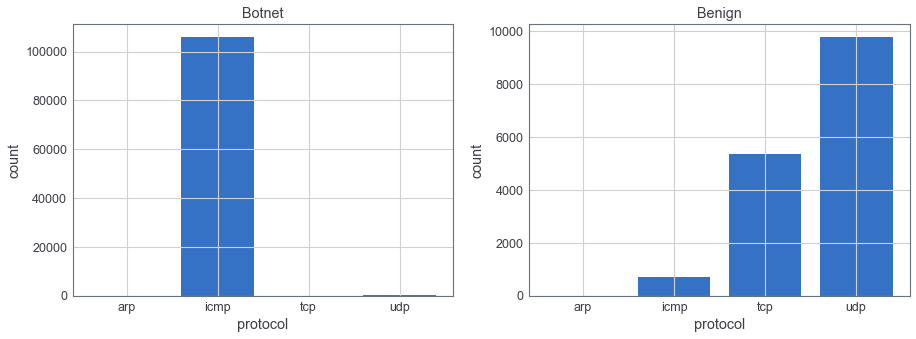

In [8]:
protocol_1 = np.unique(source10_botnet['Proto'], return_counts=True)[1]
protocol_1 = np.insert(protocol_1, 0, 0)
protocol_0 = np.unique(source10_benign['Proto'], return_counts=True)[1]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(['arp', 'icmp', 'tcp', 'udp'], [height for height in protocol_1])
plt.xlabel('protocol')
plt.ylabel('count')
plt.title("Botnet")
plt.subplot(1,2,2)
plt.bar(['arp', 'icmp', 'tcp', 'udp'], [height for height in protocol_0])
plt.xlabel('protocol')
plt.ylabel('count')
plt.title('Benign')
plt.show()

In [9]:
# encode protocol
protocol_encoder = {'arp': 0, 'udp': 1, 'tcp': 2, 'icmp': 3}
source10["Proto"].replace('arp', protocol_encoder['arp'], inplace=True)
source10["Proto"].replace('udp', protocol_encoder['udp'], inplace=True)
source10["Proto"].replace('tcp', protocol_encoder['tcp'], inplace=True)
source10["Proto"].replace('icmp', protocol_encoder['icmp'], inplace=True)

#### Selected Feature 2: Duration

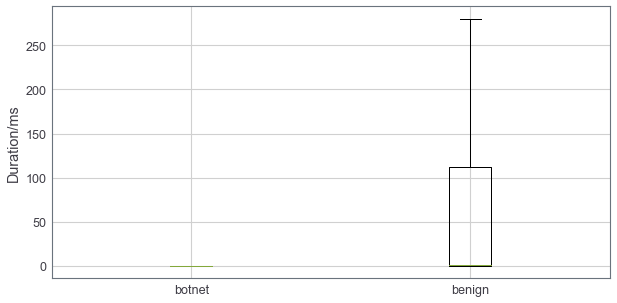

-botnet 
 mean: 90.82559153096368 std: 292.0150242011546

-benign 
 mean: 46.585669888622334 std: 301.2336573129555


In [10]:
plt.figure(figsize=(10, 5))
plt.boxplot(
    [source10_botnet["Dur"].values * 1e3, source10_benign["Dur"].values * 1e3],
    showfliers=False,
    labels=['botnet', 'benign'])
plt.ylabel("Duration/ms")
plt.show()

print("-botnet \n", "mean:", source10_botnet["Dur"].mean(), "std:",
      source10_botnet["Dur"].std())
print()
print("-benign \n", "mean:", source10_benign["Dur"].mean(), "std:",
      source10_benign["Dur"].std())

#### Combine to One

In [11]:
from sklearn.preprocessing import Normalizer, KBinsDiscretizer
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

In [12]:
features = source10[['Dur', 'Proto']]
features.head()

,Dur,Proto
407,3587.569824,2
697,198.072739,2
717,197.928329,2
896,0.000399,1
897,0.000400,1


In [13]:
# normalization
norm = Normalizer().fit(features)
features_norm = norm.transform(features)

# pca conversion
pca = PCA(n_components=1)
feature_comb = pca.fit_transform(features_norm, y=source10['Botnet'].values).reshape(-1,1)

In [14]:
# select the best number of bins
spearman = []
for i in range(2,100):
    KBins = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    feature_disc = KBins.fit_transform(feature_comb)
    spearman.append(spearmanr(feature_disc, feature_comb)[0])

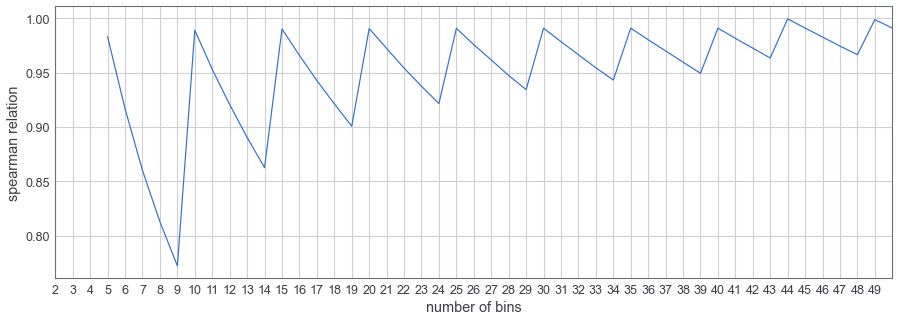

In [15]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(2,100), spearman)
plt.xlim([2,50])
plt.xticks(np.arange(2,50))
plt.xlabel("number of bins")
plt.ylabel("spearman relation")
plt.show()

In [16]:
feature_disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit_transform(feature_comb)

source10['feature'] = feature_disc
source10.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Botnet,feature
407,2011/08/18 10:19:15.693956,3587.569824,2,147.32.84.164,54784,<?>,74.125.232.215,443,PA_PA,0.0,0.0,3049,978731,245317,flow=From-Normal-V51-Grill,False,2.0
697,2011/08/18 10:19:18.143576,198.072739,2,147.32.84.164,56165,<?>,74.125.232.197,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
717,2011/08/18 10:19:18.303590,197.928329,2,147.32.84.164,57965,<?>,209.85.149.138,80,FA_FA,0.0,0.0,14,924,462,flow=From-Normal-V51-Grill,False,2.0
896,2011/08/18 10:19:19.838272,0.000399,1,147.32.84.170,45807,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0
897,2011/08/18 10:19:19.839123,0.000400,1,147.32.84.170,35380,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Normal-V51-Stribrek,False,1.0


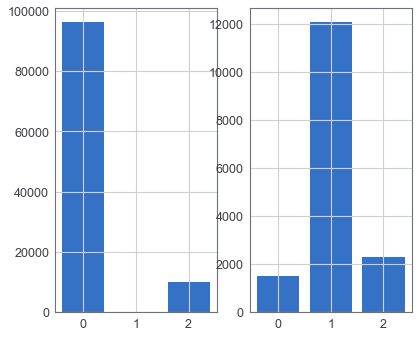

In [17]:
source10_botnet = source10[source10['Botnet'] == 1]
source10_benign = source10[source10['Botnet'] != 1]

botnet_result = np.unique(source10_botnet.feature.values, return_counts=True)
benign_result = np.unique(source10_benign.feature.values, return_counts=True)

plt.subplot(121)
plt.bar(botnet_result[0], botnet_result[1])
plt.xticks(botnet_result[0])
plt.subplot(122)
plt.bar(benign_result[0], benign_result[1])
plt.xticks(benign_result[0])
plt.show()

### 1b. Answers and explanation

## 2. Frequent task – 1/2 A4 (Individual)

### 2a. Use the SPACE SAVING algorithm

### 2b. Analysis and answers to the questions

## 3. Sketching task – 1/2 A4 (Individual)

### 3a. COUNT-MIN sketch


### 3b. Analysis and answers to the questions

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual)

### 4a. Implementation

### 4b. Analysis and answers to the questions

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual)

### 5a. Implementation - locality sensitive hashing

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Botnet profiling task – 1/2 A4

### 6a. Learn a sequential model

### 6b. Analysis and answers to the questions.

## 7.Botnet fingerprinting task – 1/2 A4

### 7a. Fingerprinting


### 7b. Analysis and answers to the questions.

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.